This notebook contains all of our ideas for what should be included in the EDA.

In [2]:
#Library Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

from difflib import SequenceMatcher

In [3]:
#Reading the files
df_exreviews = pd.read_excel(os.path.join("..", "Metacritic dataset", "ExpertReviews.xlsx"))
df_metaclean = pd.read_excel(os.path.join("..", "Metacritic dataset", "metaClean43Brightspace.xlsx"))
df_sales = pd.read_excel(os.path.join("..", "Metacritic dataset", "sales.xlsx"))
df_usreviews = pd.read_excel(os.path.join("..", "Metacritic dataset", "UserReviews.xlsx"))


EDA Scope: 

- What variables matter
- What needs cleaning
- What transformations are useful
- Where the outliers are
- What the relationships look like

We should anser these questions in the notebook

# 1.1 MetaCritic Data Analysis (Jun)

Number of rows to columns: (11364, 13)

Number of missing values in dataset:
url              0 (0.0%)
title            0 (0.0%)
studio         350 (3.1%)
rating        1067 (9.4%)
runtime        255 (2.2%)
cast         3702 (32.6%)
director        14 (0.1%)
genre           20 (0.2%)
summary      5897 (51.9%)
awards       6977 (61.4%)
metascore        0 (0.0%)
userscore    2105 (18.5%)
RelDate          0 (0.0%)
dtype: object


,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11
2,https://www.metacritic.com/movie/10-items-or-less,10 Items or Less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,54,5.8,2006-12-01
3,https://www.metacritic.com/movie/10-years,10 Years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,61,6.9,2012-09-14
4,https://www.metacritic.com/movie/100-bloody-acres,100 Bloody Acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,63,7.5,2013-06-28


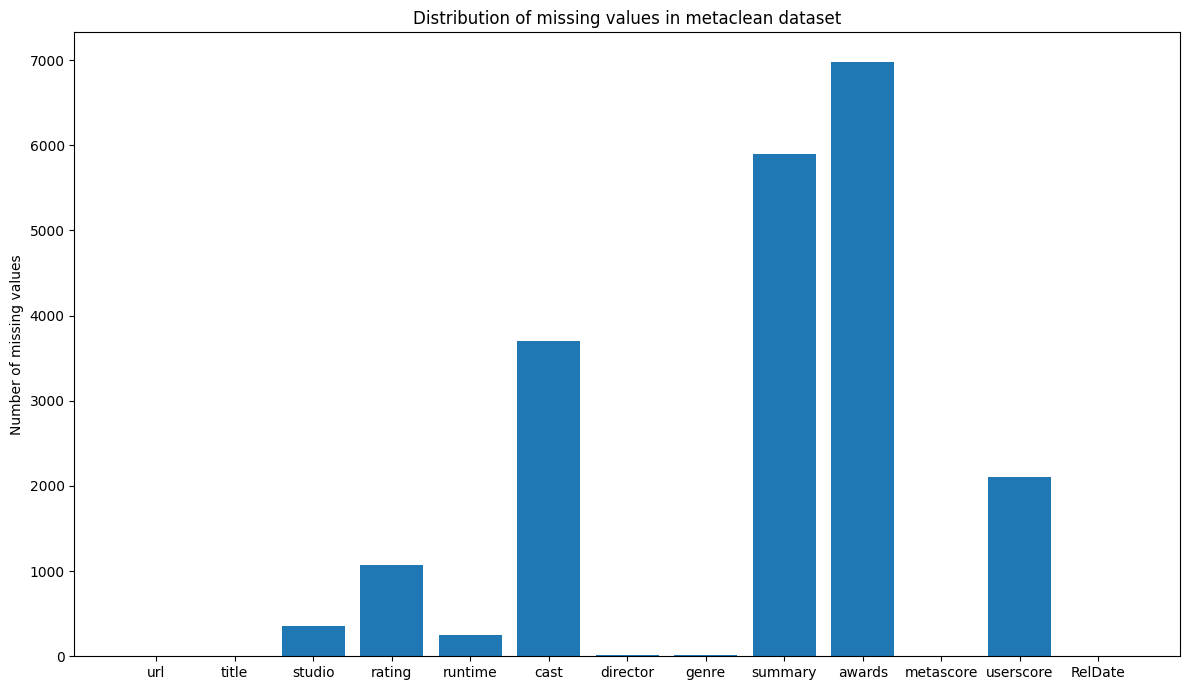

In [66]:
#General number of rows and columns
print("Number of rows to columns:", df_metaclean.shape)
print("")

#Number and percent of missing values
print("Number of missing values in dataset:") 
metaclean_missing_values = df_metaclean.isna().sum()
metaclean_missing_percentage = (df_metaclean.isna().mean() * 100).round(1)
missing_formatted = metaclean_missing_values.astype(str) + " (" + metaclean_missing_percentage.astype(str) + "%)"
print(missing_formatted)

#General shape of dataset
display(df_metaclean.head())

#Plot percentage of missing values per colums
plt.figure(figsize=(12, 7))
plt.bar(metaclean_missing_values.index, metaclean_missing_values)
plt.title("Distribution of missing values in metaclean dataset")
plt.ylabel("Number of missing values")
plt.tight_layout()
plt.show()



In [67]:
df_metaclean.columns.tolist()

['url',
 'title',
 'studio',
 'rating',
 'runtime',
 'cast',
 'director',
 'genre',
 'summary',
 'awards',
 'metascore',
 'userscore',
 'RelDate']

In [68]:
#Check studio, rating and genre for popularity
#Clean genres column
def clean_genre(g):
    if pd.isna(g):
        return np.nan

    #Split based on multiple separators
    parts = re.split(r',|/|\||;| & | - ', g)

    #Strip any whitespaces and remove empty strings
    parts = [p.strip() for p in parts if p.strip() != ""]

    return parts

df_metaclean["clean_genre"] = df_metaclean["genre"].apply(clean_genre)

#Create flat version which contains a single string per movie (based on first genre)
df_metaclean["primary_genre"] = df_metaclean["clean_genre"].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)

popularity_columns = ["studio", "rating", "primary_genre"]

def rarity_check(df_metaclean, col, rarity_threshold=0.01):
    print(f"\n===== {col.upper()} =====")

    #Popularity counts and percentages
    popularity_count = df_metaclean[col].value_counts(dropna=True)
    popularity_percentage = (
        df_metaclean[col].value_counts(normalize=True, dropna=True) * 100).round(2)

    #Print summary
    popularity_summary = pd.DataFrame({"Rarity count": popularity_count, "Percentage": popularity_percentage})
    print(popularity_summary)

    #Detect rare categories
    rare = popularity_summary[popularity_summary["Percentage"] < (rarity_threshold * 100)]
    print("\n===== Rare Categories (<1%) =====")
    print(rare if not rare.empty else "None")

    return popularity_summary, rare

#Run rarity check again
categorical_profiles = {}
for col in popularity_columns:
    categorical_profiles[col] = rarity_check(df_metaclean, col)



===== STUDIO =====
                                         Rarity count  Percentage
studio                                                           
IFC Films                                         408        3.70
Universal Pictures                                345        3.13
Sony Pictures Classics                            344        3.12
Warner Bros. Pictures                             302        2.74
Netflix                                           301        2.73
...                                               ...         ...
Mill Creek Entertainment                            1        0.01
American International Pictures                     1        0.01
Dartmouth Films                                     1        0.01
Fox Lorber Home Video                               1        0.01
20th Century Fox International Classics             1        0.01

[1118 rows x 2 columns]

===== Rare Categories (<1%) =====
                                         Rarity count  Percent

,metascore,userscore
count,11364.000000,9259.000000
mean,58.392555,6.542672
std,16.898457,1.374956
min,1.000000,0.200000
25%,47.000000,5.800000
50%,60.000000,6.700000
75%,71.000000,7.500000
max,100.000000,9.700000


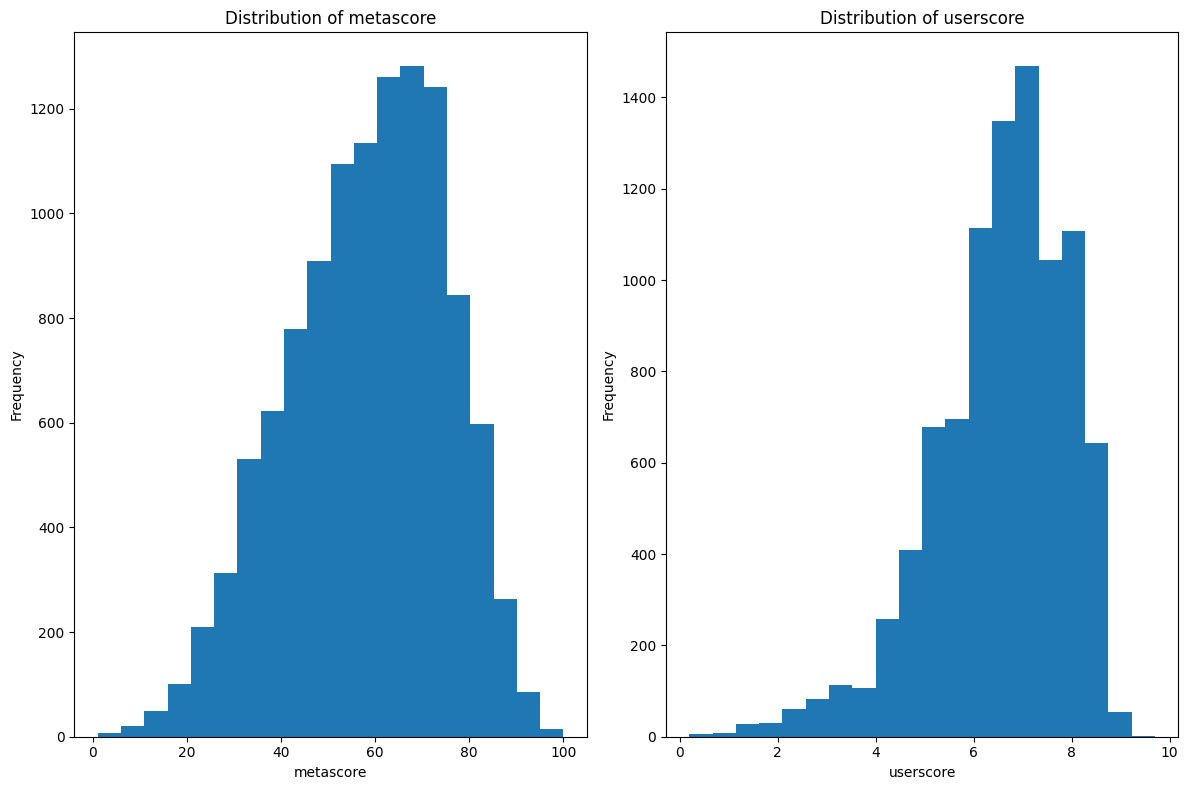

In [69]:
#Distribution of scores
score_columns = ["metascore", "userscore"]
display(df_metaclean[score_columns].describe())

#Plot histogram for meta and userscores
plt.figure(figsize=(12,8))

for i, col in enumerate(["metascore", "userscore"], 1):
    plt.subplot(1, 2, i)
    plt.hist(df_metaclean[col].dropna(), bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
#Check for duplicated movie url
duplicate_urls = df_metaclean[df_metaclean["url"].duplicated(keep=False)].sort_values("url")

print("Duplicate URLs:")
print(duplicate_urls if not duplicate_urls.empty else "None\n")

#Check for duplicated movie title
duplicate_titles = df_metaclean[df_metaclean["title"].duplicated(keep=False)].sort_values("title")

print("Duplicate Titles:")
print(duplicate_titles if not duplicate_titles.empty else "None\n")

#Check for near identical matches for movie titles
unique_title = df_metaclean["title"].dropna().unique()

similar_titles = []
threshold = 0.95        #Threshold for strictness (0-1)

for i, t1 in enumerate(unique_title):
    for j in range(i + 1, len(unique_title)):
        t2 = unique_title[j]

        #Filter for if length is very high
        if abs(len(t1) - len(t2)) > 10:
            continue
    
        ratio = SequenceMatcher(None, t1, t2).ratio()
        if ratio >= threshold:
            similar_titles.append((t1, t2, ratio))

similar_titles_df = pd.DataFrame(similar_titles, columns=["title 1", "title 2", "Similarity"])
print(f"Found {len(similar_titles_df)} similar title pairs with similarity => {threshold}")
display(similar_titles_df.head())

# 1.2   Expert Reviews Data Analysis (Rosie)

In [46]:
#  Lowercase, trim, remove special characters/ clean the url column differently
df_exreviews.columns = (
    df_exreviews.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_") 
    .str.replace(r"[^0-9a-z_]", "", regex=True)
)

print("Cleaned column names:", df_exreviews.columns.tolist())

#  CLEAN DATA COLUMNS
# Clean URL column (just lowercase and trim - preserve : / . etc.)
if "url" in df_exreviews.columns:
    df_exreviews["url"] = (
        df_exreviews["url"].astype(str)
        .str.lower()
        .str.strip()
    )

# Clean text columns (reviewer and rev)  remove special characters
text_cols = ["reviewer", "rev"]

for col in text_cols:
    if col in df_exreviews.columns:
        df_exreviews[col] = (
            df_exreviews[col].astype(str)
            .str.lower()
            .str.strip()
            .str.replace(r"[^0-9a-z\s.,!?]", "", regex=True)  # Remove special chars
            .str.replace(r"\s+", " ", regex=True)  # Normalize spaces
        )

# Clean date column (just trim)
if "datep" in df_exreviews.columns:
    df_exreviews["datep"] = (
        df_exreviews["datep"].astype(str)
        .str.strip()
    )

# Handle numeric column (idvscore)
if "idvscore" in df_exreviews.columns:
    # If it's string, convert to float; if already float, keep as is
    if df_exreviews["idvscore"].dtype == "object":
        df_exreviews["idvscore"] = pd.to_numeric(df_exreviews["idvscore"], errors="coerce")


print(df_exreviews.head())


Cleaned column names: ['url', 'idvscore', 'reviewer', 'datep', 'rev']
                                        url  idvscore         reviewer datep  \
0  https://www.metacritic.com/movie/bronson     100.0    andrew ohehir  None   
1  https://www.metacritic.com/movie/bronson      90.0       a.o. scott  None   
2  https://www.metacritic.com/movie/bronson      90.0             none  None   
3  https://www.metacritic.com/movie/bronson      83.0      noel murray  None   
4  https://www.metacritic.com/movie/bronson      80.0  joshua rothkopf  None   

                                                 rev  
0  bronson owes a little or a lot to kubrick s cl...  
1  bronson invites you to admire its protagonist ...  
2  whether it s petersonbronson s more theatrical...  
3  there are two bronsons on display here the imp...  
4  refn has somehow found his way to an authentic...  


In [ ]:
# number of rows and columns in ExpertReviews
print("There are {} rows and {} columns in ExpertReviews".format(df_exreviews.shape[0], df_exreviews.shape[1]))

There are 238973 rows and 5 columns in ExpertReviews


In [51]:
# take look at datep column 
df_exreviews['datep'].isna().sum()
df_exreviews['datep'].unique()[:20]



<DatetimeArray>
[                'NaT', '2011-04-14 00:00:00', '2011-04-12 00:00:00',
 '2013-05-26 00:00:00', '2011-04-16 00:00:00', '2011-04-15 00:00:00',
 '2011-02-10 00:00:00', '2011-02-09 00:00:00', '2011-01-20 00:00:00',
 '2011-01-07 00:00:00', '2011-03-04 00:00:00', '2011-01-04 00:00:00',
 '2011-01-05 00:00:00', '2011-03-17 00:00:00', '2011-08-17 00:00:00',
 '2011-06-09 00:00:00', '2011-06-07 00:00:00', '2011-06-06 00:00:00',
 '2011-08-04 00:00:00', '2011-08-18 00:00:00']
Length: 20, dtype: datetime64[ns]

In [50]:
# clean the column date 


# convert "apr 14 2011" to datetime
if "datep" in df_exreviews.columns:
    # First clean: lowercase and trim
    df_exreviews["datep"] = df_exreviews["datep"].astype(str).str.lower().str.strip()
    
    # Replace "none" with NaN
    df_exreviews["datep"] = df_exreviews["datep"].replace(["none", "null", "nan", ""], pd.NA)
    
    # Convert to datetime (handles "apr 14 2011" format)
    df_exreviews["datep"] = pd.to_datetime(df_exreviews["datep"], errors="coerce")
    
    # Optional: Create a clean string version
    df_exreviews["datep_clean"] = df_exreviews["datep"].dt.strftime("%Y-%m-%d")

print(f"\nDate column sample:")
print(df_exreviews[["datep", "datep_clean"]].head(10) if "datep" in df_exreviews.columns else "No datep column")

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_37520\1374155106.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_exreviews["datep"] = pd.to_datetime(df_exreviews["datep"], errors="coerce")



Date column sample:
  datep datep_clean
0   NaT         NaN
1   NaT         NaN
2   NaT         NaN
3   NaT         NaN
4   NaT         NaN
5   NaT         NaN
6   NaT         NaN
7   NaT         NaN
8   NaT         NaN
9   NaT         NaN


In [52]:
#  check the unique df_exreviews
columns_to_check = ['url', 'idvscore', 'reviewer', 'datep', 'rev']

for col in columns_to_check:
    print(f"\n===== Checking column: {col} =====")
    print("Is column unique?               :", df_exreviews[col].is_unique)
    print("Number of duplicate values      :", df_exreviews[col].duplicated().sum())
    print("Number of unique values         :", df_exreviews[col].nunique())
    print("Total number of rows            :", df_exreviews.shape[0])



===== Checking column: url =====
Is column unique?               : False
Number of duplicate values      : 227609
Number of unique values         : 11364
Total number of rows            : 238973

===== Checking column: idvscore =====
Is column unique?               : False
Number of duplicate values      : 238876
Number of unique values         : 96
Total number of rows            : 238973

===== Checking column: reviewer =====
Is column unique?               : False
Number of duplicate values      : 237787
Number of unique values         : 1186
Total number of rows            : 238973

===== Checking column: datep =====
Is column unique?               : False
Number of duplicate values      : 235067
Number of unique values         : 3905
Total number of rows            : 238973

===== Checking column: rev =====
Is column unique?               : False
Number of duplicate values      : 4786
Number of unique values         : 234187
Total number of rows            : 238973


In [57]:
# analysing url column
# Count occurrences for each URL
url_counts = df_exreviews['url'].value_counts()

# Convert occurrences to duplicate counts
url_duplicates = url_counts - 1   # subtract 1 → number of duplicates

# Put in a DataFrame for clear viewing
df_url_duplicates = url_duplicates.reset_index()
df_url_duplicates.columns = ['url', 'num_duplicates']

# Sort from most duplicated to least
df_url_duplicates = df_url_duplicates.sort_values('num_duplicates', ascending=False)

df_url_duplicates.head(20)   # show top 20 duplicated URLs





,url,num_duplicates
0,https://www.metacritic.com/movie/dune-part-one,66
1,https://www.metacritic.com/movie/no-time-to-die,65
2,https://www.metacritic.com/movie/west-side-sto...,61
3,https://www.metacritic.com/movie/once-upon-a-t...,61
4,https://www.metacritic.com/movie/eternals,61
5,https://www.metacritic.com/movie/star-wars-epi...,60
6,https://www.metacritic.com/movie/a-star-is-born,59
7,https://www.metacritic.com/movie/mission-impos...,59
8,https://www.metacritic.com/movie/joker,59
9,https://www.metacritic.com/movie/spider-man-no...,59


In [58]:
# 10 least duplicated
df_url_duplicates.tail(10)


,url,num_duplicates
10842,https://www.metacritic.com/movie/benji,6
10843,https://www.metacritic.com/movie/white-sun-set...,6
10844,https://www.metacritic.com/movie/tank-432,6
10845,https://www.metacritic.com/movie/a-family-affa...,6
10846,https://www.metacritic.com/movie/crazy-wisdom-...,6
10847,https://www.metacritic.com/movie/test,6
10848,https://www.metacritic.com/movie/american-desi,6
10849,https://www.metacritic.com/movie/future-weather,6
11362,https://www.metacritic.com/movie/whiteout,0
11363,https://www.metacritic.com/movie/micmac---au-f...,0


In [59]:
# are the duplicate url have same value or not 
# For each URL: how many rows and how many UNIQUE full rows?
url_summary = (
    df_exreviews
    .groupby("url")
    .apply(lambda g: pd.Series({
        "n_rows": len(g),
        "n_unique_rows": g.drop_duplicates().shape[0]
    }))
    .reset_index()
)

# Flag URLs where all rows are identical (only 1 unique row, but possibly many duplicates)
url_summary["all_rows_identical"] = url_summary["n_unique_rows"] == 1

print(url_summary.head(10))


                                                 url  n_rows  n_unique_rows  \
0  https://www.metacritic.com/movie/!women-art-re...      11             11   
1  https://www.metacritic.com/movie/10-cloverfiel...      43             43   
2  https://www.metacritic.com/movie/10-items-or-less      20             20   
3          https://www.metacritic.com/movie/10-years      18             18   
4  https://www.metacritic.com/movie/100-bloody-acres      10             10   
5       https://www.metacritic.com/movie/100-streets      12             12   
6  https://www.metacritic.com/movie/1000-times-go...      22             22   
7          https://www.metacritic.com/movie/10000-bc      29             29   
8          https://www.metacritic.com/movie/10000-km      12             12   
9        https://www.metacritic.com/movie/1001-grams       7              7   

   all_rows_identical  
0               False  
1               False  
2               False  
3               False  
4         

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_37520\2757911532.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [60]:
# i want to check if there is any unique values 
unique_true_duplicates = url_summary[
    (url_summary["n_unique_rows"] == 1) & (url_summary["n_rows"] > 1)
]

print("Number of URLs with TRUE identical duplicates:", unique_true_duplicates.shape[0])
unique_true_duplicates


Number of URLs with TRUE identical duplicates: 0


,url,n_rows,n_unique_rows,all_rows_identical


In [61]:
reviewer_counts = (
    df_exreviews.groupby("url")["reviewer"]
    .nunique()
    .reset_index(name="unique_reviewers")
)

reviewer_counts.head()


,url,unique_reviewers
0,https://www.metacritic.com/movie/!women-art-re...,7
1,https://www.metacritic.com/movie/10-cloverfiel...,42
2,https://www.metacritic.com/movie/10-items-or-less,18
3,https://www.metacritic.com/movie/10-years,12
4,https://www.metacritic.com/movie/100-bloody-acres,9


In [62]:
same_reviewer_duplicates = (
    df_exreviews.groupby(["url", "reviewer"]).size().reset_index(name="count")
)
same_reviewer_duplicates[same_reviewer_duplicates["count"] > 1]


,url,reviewer,count
4,https://www.metacritic.com/movie/!women-art-re...,none,5
39,https://www.metacritic.com/movie/10-cloverfiel...,none,2
61,https://www.metacritic.com/movie/10-items-or-less,none,3
75,https://www.metacritic.com/movie/10-years,none,7
86,https://www.metacritic.com/movie/100-bloody-acres,none,2
...,...,...,...
222673,https://www.metacritic.com/movie/zookeeper,none,3
222745,https://www.metacritic.com/movie/zoolander-2,none,2
222764,https://www.metacritic.com/movie/zoom,none,6
222773,https://www.metacritic.com/movie/zoom-2016,none,2


In [63]:
# avr idvscore per movie 
idvscore_avg = (
    df_exreviews.groupby("url")["idvscore"]
    .mean()
    .reset_index(name="avg_idvscore")
    .sort_values("avg_idvscore", ascending=False)
)

idvscore_avg.head(10)   # top 10 movies by expert score


,url,avg_idvscore
1477,https://www.metacritic.com/movie/boyhood,97.480000
5713,https://www.metacritic.com/movie/moonlight-2016,96.245283
6360,https://www.metacritic.com/movie/pans-labyrinth,95.864865
9859,https://www.metacritic.com/movie/the-social-ne...,94.452381
23,https://www.metacritic.com/movie/12-years-a-slave,94.438596
6390,https://www.metacritic.com/movie/parasite,94.346154
5350,https://www.metacritic.com/movie/manchester-by...,94.226415
114,https://www.metacritic.com/movie/4-months-3-we...,94.216216
4695,https://www.metacritic.com/movie/killer-of-sheep,94.173913
7705,https://www.metacritic.com/movie/spirited-away,93.926829


In [64]:
idvscore_avg.tail(10)   # least 10 movies by expert score

,url,avg_idvscore
7879,https://www.metacritic.com/movie/strippers,12.571429
10809,https://www.metacritic.com/movie/vulgar,11.500000
5926,https://www.metacritic.com/movie/national-lamp...,11.071429
3867,https://www.metacritic.com/movie/hillarys-amer...,9.352941
9835,https://www.metacritic.com/movie/the-singing-f...,8.857143
2345,https://www.metacritic.com/movie/death-of-a-na...,7.000000
1806,https://www.metacritic.com/movie/chaos,6.666667
10655,https://www.metacritic.com/movie/united-passions,5.555556
5557,https://www.metacritic.com/movie/micmac---au-f...,NaN
11072,https://www.metacritic.com/movie/whiteout,NaN


In [ ]:
# the url that has the most reviews
url_review_counts = (
    df_exreviews.groupby("url").size()
    .reset_index(name="review_count")
    .sort_values("review_count", ascending=False)
)

url_review_counts.head(10)   # show top 10 most-reviewed movies


,url,review_count
2663,https://www.metacritic.com/movie/dune-part-one,67
6045,https://www.metacritic.com/movie/no-time-to-die,66
10961,https://www.metacritic.com/movie/west-side-sto...,62
6204,https://www.metacritic.com/movie/once-upon-a-t...,62
2840,https://www.metacritic.com/movie/eternals,62
7759,https://www.metacritic.com/movie/star-wars-epi...,61
343,https://www.metacritic.com/movie/a-star-is-born,60
4540,https://www.metacritic.com/movie/joker,60
7695,https://www.metacritic.com/movie/spider-man-no...,60
5641,https://www.metacritic.com/movie/mission-impos...,60


The dataset has 238,973 rows and 5 columns. The columns are:
['url', 'idvscore', 'reviewer', 'datep', 'rev']
Each row corresponds to a movie, identified by its URL. The same URL can appear more than once, but these are not duplicates. Each entry is a different review with unique values in the other columns.
This dataset includes a wide variety of expert movie reviews. Many entries are missing information in the reviewer and datep columns. The idvscore ranges from 1 to 100, with the highest average score about 97.4 and the lowest about 5.5.
Most movies have several reviews, and nearly all of them are unique:
The review text is almost always different, indicating that the dataset is of high quality. Reviewers often show up in reviews for different movies, as you would expect from professional critics. However, many entries do not include the reviewer's name.


# 1.3  User Reviews Data Analysis (Rosie)

In [66]:
# read columns name 
print(df_usreviews.columns.tolist())


['url', 'idvscore', 'reviewer', 'dateP', 'Rev', 'thumbsUp', 'thumbsTot']


In [67]:
# cleaning but keep the format of url and date columns

# 1. Clean column names: lowercase, trim, remove spaces, remove special chars in column names
df_usreviews.columns = (
    df_usreviews.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"[^0-9a-z_]", "", regex=True)
)

print("Cleaned column names:", df_usreviews.columns.tolist())
# Should become: ['url', 'idvscore', 'reviewer', 'datep', 'rev', 'thumbsup', 'thumbstot']


# 2. Clean URL column – ONLY lowercase + trim (NO removal of / : . etc.)
if "url" in df_usreviews.columns:
    df_usreviews["url"] = (
        df_usreviews["url"]
        .astype(str)
        .str.lower()
        .str.strip()       # DO NOT touch format
    )


# 3. Clean text columns (reviewer + review text) – remove special characters
text_cols = ["reviewer", "rev"]

for col in text_cols:
    if col in df_usreviews.columns:
        df_usreviews[col] = (
            df_usreviews[col]
            .astype(str)
            .str.lower()
            .str.strip()
            .str.replace(r"[^0-9a-z\s.,!?']", "", regex=True)  # Remove unwanted chars BUT keep punctuation
            .str.replace(r"\s+", " ", regex=True)              # Normalize multiple spaces
        )


# 4. Do NOT modify date format — only trim spaces
if "datep" in df_usreviews.columns:
    df_usreviews["datep"] = (
        df_usreviews["datep"]
        .astype(str)
        .str.strip()       # DO NOT change the format
    )
    # No conversion to datetime here because you requested no format change.


# 5. Convert numeric columns
num_cols = ["idvscore", "thumbsup", "thumbstot"]

for col in num_cols:
    if col in df_usreviews.columns:
        df_usreviews[col] = pd.to_numeric(df_usreviews[col], errors="coerce")


# 6. Quick preview
print(df_usreviews.head())


Cleaned column names: ['url', 'idvscore', 'reviewer', 'datep', 'rev', 'thumbsup', 'thumbstot']
                                        url  idvscore        reviewer  \
0  https://www.metacritic.com/movie/bronson         8  'longbottom94'   
1  https://www.metacritic.com/movie/bronson         9       'martinb'   
2  https://www.metacritic.com/movie/bronson        10        'jaakko'   
3  https://www.metacritic.com/movie/bronson         6         'capor'   
4  https://www.metacritic.com/movie/bronson         8      'orwellb.'   

            datep                                                rev  \
0  'Apr 25, 2013'  'many have dismissed this film for not explori...   
1  'Oct 13, 2009'  'anyone who doesn t like this movie simply jus...   
2  'Jul 19, 2012'  'not sure what to think at this film at first....   
3  'Oct 13, 2009'  'nicely portrayed but it lacks the elements to...   
4  'Oct 10, 2009'  'bronson is more than entertainment. it is art...   

   thumbsup  thumbstot  
0       

In [68]:
print("There are {} rows and {} columns in UserReviews".format(df_usreviews.shape[0], df_usreviews.shape[1]))


There are 316249 rows and 7 columns in UserReviews


In [69]:
# Number of missing values in datep
print("Missing values in datep:", df_usreviews['datep'].isna().sum())

# Show first 20 unique date values
print(df_usreviews['datep'].unique()[:20])


Missing values in datep: 0
["'Apr 25, 2013'" "'Oct 13, 2009'" "'Jul 19, 2012'" "'Oct 10, 2009'"
 "'Jun 10, 2011'" "'Nov 30, 2013'" "'Apr 22, 2011'" "'Aug 10, 2012'"
 "'Aug 19, 2011'" "'Mar 6, 2015'" "'Jul 4, 2013'" "'Jan 6, 2016'"
 "'Jan 16, 2015'" "'May 27, 2013'" "'Jun 8, 2014'" "'Aug 14, 2014'"
 "'Apr 7, 2019'" "'Sep 9, 2015'" "'Jun 25, 2016'" "'Aug 26, 2015'"]


In [70]:
# 1. Remove extra single quotes around the date
df_usreviews["datep"] = df_usreviews["datep"].str.replace("'", "", regex=False)

# 2. Convert to datetime (auto-detects the format "Apr 25, 2013")
df_usreviews["datep"] = pd.to_datetime(df_usreviews["datep"], errors="coerce")

# 3. Convert to YYYY-MM-DD format
df_usreviews["datep"] = df_usreviews["datep"].dt.strftime("%Y-%m-%d")

# Preview
df_usreviews["datep"].head(20)


0     2013-04-25
1     2009-10-13
2     2012-07-19
3     2009-10-13
4     2009-10-10
5     2011-06-10
6     2013-11-30
7     2011-04-22
8     2012-08-10
9     2011-08-19
10    2015-03-06
11    2013-07-04
12    2016-01-06
13    2015-01-16
14    2013-05-27
15    2014-06-08
16    2014-08-14
17    2019-04-07
18    2015-09-09
19    2016-06-25
Name: datep, dtype: object

In [71]:
# Check the uniqueness of UserReviews columns
columns_to_check = ['url', 'idvscore', 'reviewer', 'datep', 'rev', 'thumbsup', 'thumbstot']

for col in columns_to_check:
    print(f"\n===== Checking column: {col} =====")
    print("Is column unique?               :", df_usreviews[col].is_unique)
    print("Number of duplicate values      :", df_usreviews[col].duplicated().sum())
    print("Number of unique values         :", df_usreviews[col].nunique())
    print("Total number of rows            :", df_usreviews.shape[0])



===== Checking column: url =====
Is column unique?               : False
Number of duplicate values      : 307353
Number of unique values         : 8896
Total number of rows            : 316249

===== Checking column: idvscore =====
Is column unique?               : False
Number of duplicate values      : 316238
Number of unique values         : 11
Total number of rows            : 316249

===== Checking column: reviewer =====
Is column unique?               : False
Number of duplicate values      : 212019
Number of unique values         : 104230
Total number of rows            : 316249

===== Checking column: datep =====
Is column unique?               : False
Number of duplicate values      : 309760
Number of unique values         : 6489
Total number of rows            : 316249

===== Checking column: rev =====
Is column unique?               : False
Number of duplicate values      : 5351
Number of unique values         : 310898
Total number of rows            : 316249

===== Checki

In [72]:
# Analyzing URL column in UserReviews

# 1. Count how many times each URL appears
url_counts = df_usreviews['url'].value_counts()

# 2. Convert occurrences to duplicate counts (subtract 1)
url_duplicates = url_counts - 1

# 3. Put into a DataFrame for readability
df_url_duplicates = url_duplicates.reset_index()
df_url_duplicates.columns = ['url', 'num_duplicates']

# 4. Sort from most repeated URL to least
df_url_duplicates = df_url_duplicates.sort_values('num_duplicates', ascending=False)

# 5. Show top 20 URLs with most duplicate entries
df_url_duplicates.head(20)


,url,num_duplicates
0,https://www.metacritic.com/movie/joker,2762
1,https://www.metacritic.com/movie/star-wars-epi...,2537
2,https://www.metacritic.com/movie/star-wars-epi...,2234
3,https://www.metacritic.com/movie/captain-marvel,2074
4,https://www.metacritic.com/movie/star-wars-epi...,1943
5,https://www.metacritic.com/movie/zack-snyders-...,1704
6,https://www.metacritic.com/movie/batman-v-supe...,1498
7,https://www.metacritic.com/movie/avengers-endgame,1492
8,https://www.metacritic.com/movie/the-dark-knight,1459
9,https://www.metacritic.com/movie/the-dark-knig...,1452


In [73]:
# For each URL: how many rows and how many UNIQUE full rows?
url_summary = (
    df_usreviews
    .groupby("url")
    .apply(lambda g: pd.Series({
        "n_rows": len(g),
        "n_unique_rows": g.drop_duplicates().shape[0]
    }))
    .reset_index()
)

# Flag URLs where all rows are identical 
# (n_unique_rows == 1 means all rows have EXACT same values)
url_summary["all_rows_identical"] = url_summary["n_unique_rows"] == 1

# Show first 10 URLs
print(url_summary.head(10))


                                                 url  n_rows  n_unique_rows  \
0  https://www.metacritic.com/movie/10-cloverfiel...     201            201   
1  https://www.metacritic.com/movie/10-items-or-less       9              9   
2          https://www.metacritic.com/movie/10-years       7              7   
3  https://www.metacritic.com/movie/100-bloody-acres       2              2   
4          https://www.metacritic.com/movie/10000-bc     137            137   
5          https://www.metacritic.com/movie/10000-km       2              2   
6    https://www.metacritic.com/movie/102-dalmatians      10             10   
7         https://www.metacritic.com/movie/10th-wolf       4              4   
8        https://www.metacritic.com/movie/11-flowers       1              1   
9        https://www.metacritic.com/movie/11-minutes       1              1   

   all_rows_identical  
0               False  
1               False  
2               False  
3               False  
4         

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_37520\3293445052.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [74]:
# verify which url are true 
url_summary[url_summary["all_rows_identical"] == True]


,url,n_rows,n_unique_rows,all_rows_identical
8,https://www.metacritic.com/movie/11-flowers,1,1,True
9,https://www.metacritic.com/movie/11-minutes,1,1,True
11,https://www.metacritic.com/movie/12-hour-shift,1,1,True
13,https://www.metacritic.com/movie/12-oclock-boys,1,1,True
17,https://www.metacritic.com/movie/1208-east-of-...,1,1,True
...,...,...,...,...
8874,https://www.metacritic.com/movie/zero-motivation,1,1,True
8878,https://www.metacritic.com/movie/zhou-yu-de-hu...,1,1,True
8880,https://www.metacritic.com/movie/zizek!,1,1,True
8884,https://www.metacritic.com/movie/zombie-honeymoon,1,1,True


In [79]:
# see actual duplicate 
true_duplicates = url_summary[
    (url_summary["n_rows"] > 1) & (url_summary["all_rows_identical"])
][["url", "n_rows", "n_unique_rows"]]

true_duplicates



,url,n_rows,n_unique_rows
6712,https://www.metacritic.com/movie/the-debut,3,1
8529,https://www.metacritic.com/movie/wattstax,2,1


In [82]:
# check the duplicate 
duplicate_urls = true_duplicates["url"].tolist()
duplicate_urls
cols_to_show = ["url", "idvscore", "reviewer", "datep", "thumbsup", "thumbstot"]
cols_with_short_review = cols_to_show + ["rev"]

for url in duplicate_urls:
    print("\nURL:", url)
    temp = df_usreviews[df_usreviews["url"] == url].copy()
    temp["rev"] = temp["rev"].str.slice(0, 80)  # show first 80 chars only
    display(temp[cols_with_short_review])




URL: https://www.metacritic.com/movie/the-debut


,url,idvscore,reviewer,datep,thumbsup,thumbstot,rev
283645,https://www.metacritic.com/movie/the-debut,10,'triaf.',2003-03-16,0,0.0,"'this is not just an ordinary filipino film, b..."
283646,https://www.metacritic.com/movie/the-debut,10,'triaf.',2003-03-16,0,0.0,"'this is not just an ordinary filipino film, b..."
283647,https://www.metacritic.com/movie/the-debut,10,'triaf.',2003-03-16,0,0.0,"'this is not just an ordinary filipino film, b..."



URL: https://www.metacritic.com/movie/wattstax


,url,idvscore,reviewer,datep,thumbsup,thumbstot,rev
248470,https://www.metacritic.com/movie/wattstax,6,'anonymous',2003-06-14,0,0.0,'too many musical performances chopped in half...
248471,https://www.metacritic.com/movie/wattstax,6,'anonymous',2003-06-14,0,0.0,'too many musical performances chopped in half...


In [83]:
#  drop the duplicate rows
urls_to_clean = [
    "https://www.metacritic.com/movie/the-debut",
    "https://www.metacritic.com/movie/wattstax"
]
df_usreviews_clean = df_usreviews.copy()

for u in urls_to_clean:
    subset_df = df_usreviews_clean[df_usreviews_clean["url"] == u]
    df_usreviews_clean = df_usreviews_clean.drop(subset_df.index[1:])  # keep only first row
(df_usreviews_clean["url"].value_counts()[urls_to_clean])


url
https://www.metacritic.com/movie/the-debut    1
https://www.metacritic.com/movie/wattstax     1
Name: count, dtype: int64

In [84]:
reviewer_counts = (
    df_usreviews.groupby("url")["reviewer"]
    .nunique()
    .reset_index(name="unique_reviewers")
)

reviewer_counts.head()


,url,unique_reviewers
0,https://www.metacritic.com/movie/10-cloverfiel...,201
1,https://www.metacritic.com/movie/10-items-or-less,9
2,https://www.metacritic.com/movie/10-years,7
3,https://www.metacritic.com/movie/100-bloody-acres,2
4,https://www.metacritic.com/movie/10000-bc,137


In [86]:
reviewer_counts.sort_values("unique_reviewers", ascending=False).head(5)


,url,unique_reviewers
3517,https://www.metacritic.com/movie/joker,2762
6046,https://www.metacritic.com/movie/star-wars-epi...,2538
6048,https://www.metacritic.com/movie/star-wars-epi...,2235
1303,https://www.metacritic.com/movie/captain-marvel,2075
6047,https://www.metacritic.com/movie/star-wars-epi...,1942


In [88]:
reviewer_counts.sort_values("unique_reviewers", ascending=True).head(5)


,url,unique_reviewers
8895,https://www.metacritic.com/movie/zus-zo,1
1137,https://www.metacritic.com/movie/brand-upon-th...,1
4601,https://www.metacritic.com/movie/nathalie,1
4599,https://www.metacritic.com/movie/nas-time-is-i...,1
4598,https://www.metacritic.com/movie/narco-cultura,1


In [89]:
same_reviewer_duplicates = (
    df_exreviews.groupby(["url", "reviewer"]).size().reset_index(name="count")
)
same_reviewer_duplicates[same_reviewer_duplicates["count"] > 1]


,url,reviewer,count
4,https://www.metacritic.com/movie/!women-art-re...,none,5
39,https://www.metacritic.com/movie/10-cloverfiel...,none,2
61,https://www.metacritic.com/movie/10-items-or-less,none,3
75,https://www.metacritic.com/movie/10-years,none,7
86,https://www.metacritic.com/movie/100-bloody-acres,none,2
...,...,...,...
222673,https://www.metacritic.com/movie/zookeeper,none,3
222745,https://www.metacritic.com/movie/zoolander-2,none,2
222764,https://www.metacritic.com/movie/zoom,none,6
222773,https://www.metacritic.com/movie/zoom-2016,none,2


In [90]:
# average idvscore per movie (User Reviews)
idvscore_avg = (
    df_usreviews.groupby("url")["idvscore"]
    .mean()
    .reset_index(name="avg_idvscore")
    .sort_values("avg_idvscore", ascending=False)
)

idvscore_avg.head(10)   # top 10 user-rated movies


,url,avg_idvscore
5035,https://www.metacritic.com/movie/pellet,10.0
2539,https://www.metacritic.com/movie/full-battle-r...,10.0
2454,https://www.metacritic.com/movie/for-no-good-r...,10.0
891,https://www.metacritic.com/movie/benji,10.0
3424,https://www.metacritic.com/movie/jack-brooks-m...,10.0
7108,https://www.metacritic.com/movie/the-importanc...,10.0
7101,https://www.metacritic.com/movie/the-ignorant-...,10.0
897,https://www.metacritic.com/movie/berlin,10.0
2446,https://www.metacritic.com/movie/food-of-love,10.0
2444,https://www.metacritic.com/movie/following-sean,10.0


In [91]:
# 10 lowest-rated movies (UserReviews)
idvscore_avg.tail(10)


,url,avg_idvscore
5262,https://www.metacritic.com/movie/putty-hill,0.0
69,https://www.metacritic.com/movie/3,0.0
6332,https://www.metacritic.com/movie/terrors-advocate,0.0
4234,https://www.metacritic.com/movie/maybe-baby,0.0
6136,https://www.metacritic.com/movie/strippers,0.0
1043,https://www.metacritic.com/movie/blood-glacier,0.0
3865,https://www.metacritic.com/movie/lies,0.0
5166,https://www.metacritic.com/movie/port-authority,0.0
5320,https://www.metacritic.com/movie/rat-film,0.0
4624,https://www.metacritic.com/movie/never-again,0.0


In [92]:
# the URL that has the most user reviews
url_review_counts = (
    df_usreviews.groupby("url").size()
    .reset_index(name="review_count")
    .sort_values("review_count", ascending=False)
)

url_review_counts.head(10)   # show top 10 most-reviewed movies


,url,review_count
3517,https://www.metacritic.com/movie/joker,2763
6046,https://www.metacritic.com/movie/star-wars-epi...,2538
6048,https://www.metacritic.com/movie/star-wars-epi...,2235
1303,https://www.metacritic.com/movie/captain-marvel,2075
6047,https://www.metacritic.com/movie/star-wars-epi...,1944
8861,https://www.metacritic.com/movie/zack-snyders-...,1705
791,https://www.metacritic.com/movie/batman-v-supe...,1499
698,https://www.metacritic.com/movie/avengers-endgame,1493
6691,https://www.metacritic.com/movie/the-dark-knight,1460
6692,https://www.metacritic.com/movie/the-dark-knig...,1453


The dataset has 316,249 rows and 7 columns: ['url', 'idvscore', 'reviewer', 'dateP', 'Rev', 'thumbsUp', 'thumbsTot']. Each row is a user review for a movie, identified by its URL. The same URL can appear multiple times because popular movies receive thousands of reviews. Each row is a different review, with its own score, reviewer, text, and engagement numbers. The dataset covers many movies and includes a variety of reviewers, though many entries are missing reviewer names. User scores go from 0 to 10, with some movies getting the highest average rating and others the lowest. Most movies have many reviews, and the review texts are almost always unique, indicating that the data are of high quality. Some reviewers comment on more than one movie, which is normal for user-generated sites, but most reviews are unique and provide useful information.

# 1.4. Sales Data Analysis (Iro)

In [70]:
# Clean column names 
df_sales.columns = (
    df_sales.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_") 
    .str.replace(r"[^0-9a-z_]", "", regex=True)
)
df_sales.columns

Index(['year', 'release_date', 'title', 'genre', 'international_box_office',
       'domestic_box_office', 'worldwide_box_office', 'production_budget',
       'unnamed_8', 'opening_weekend', 'theatre_count', 'avg_run_per_theatre',
       'runtime', 'keywords', 'creative_type', 'url'],
      dtype='object')

In [71]:
# Clean text column 
text_cols = ["title", "genre", "keywords", "creative_type", "url"]

for col in text_cols:
    if col in df_sales.columns:
        df_sales[col] = (
            df_sales[col].astype(str) # convert to string
            .str.lower()
            .str.strip() # remove leading/trailing spaces
        )

In [ ]:
# Clean release_date and convert to YYYY-MM-DD 
df_sales["release_date_standard"] = (
    df_sales["release_date"]
        .astype(str)
        .str.replace(r"(st|nd|rd|th)", "", regex=True)        # remove suffixes
        .str.cat(df_sales["year"].astype(str), sep=" ")       # add year
        .pipe(pd.to_datetime, errors="coerce")                # convert to datetime
        .dt.strftime("%Y-%m-%d")                              # final format
)

In [72]:
# Convert numeric columns
num_cols = [
    "domestic_box_office", "international_box_office", "worldwide_box_office",
    "production_budget", "opening_weekend", "theatre_count",
    "avg_run_per_theatre", "runtime", "year"
]

for col in num_cols:
    if col in df_sales.columns:
        df_sales[col] = pd.to_numeric(df_sales[col], errors="coerce")

In [73]:
# number of rows and columns
print("Number of rows to columns:", df_sales.shape)
print("")
# Missing value summary
df_sales.isna().sum() # how many missing values each column has

Number of rows to columns: (30612, 16)



year                            0
release_date                    0
title                           0
genre                           0
international_box_office     9037
domestic_box_office         18728
worldwide_box_office         9037
production_budget           26132
unnamed_8                   30612
opening_weekend             19683
theatre_count               19649
avg_run_per_theatre         19660
runtime                      6053
keywords                        0
creative_type                   0
url                             0
dtype: int64

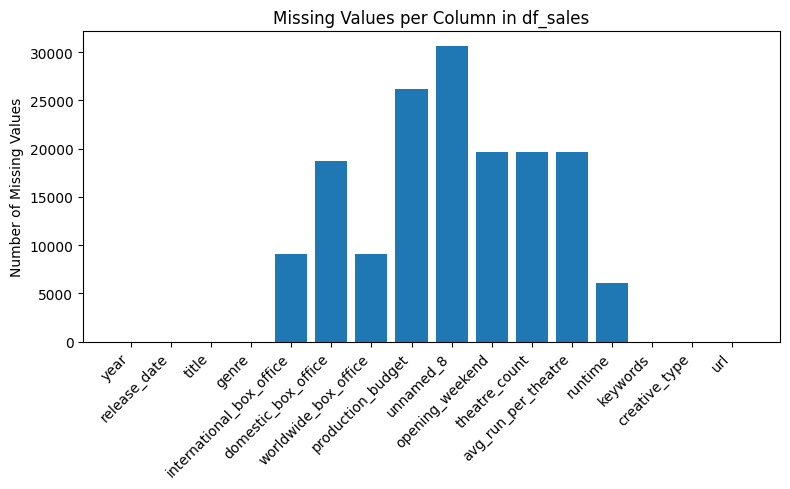

In [74]:
# Missing values for each column
missing_values = df_sales.isna().sum()

plt.figure(figsize=(8, 5))
plt.bar(missing_values.index, missing_values)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column in df_sales")
plt.tight_layout()
plt.show()

**Data Quality Overview**

The dataset contains 30,612 rows and 16 columns. Several fields exhibit substantial missingness, which affects their analytical usefulness:
- production_budget: 26,132 missing entries
- domestic_box_office: 18,728 missing entries
- international_box_office: 9,037 missing entries
- unnamed_8: 30,612 missing entries (entire column missing)

These variables will require either imputation, removal, or external data enrichment depending on the analytical objectives.

Columns with High Usability
- Several key descriptive fields are fully complete:
- year, title, genre: 0 missing values

Other fields have moderate missingness but remain potentially usable with appropriate handling:
runtime: 6,053 missing values (≈20% of records)

In [75]:
display(df_sales.head())

,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,unnamed_8,opening_weekend,theatre_count,avg_run_per_theatre,runtime,keywords,creative_type,url
0,2000,January 1st,bakha satang,drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,nan,contemporary fiction,https://www.the-numbers.com/movie/bakha-satang...
1,2001,January 12th,antitrust,thriller/suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,nan,contemporary fiction,https://www.the-numbers.com/movie/antitrust
2,2000,January 28th,santitos,nan,NaN,378562.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0,nan,nan,https://www.the-numbers.com/movie/santitos
3,2002,2002 (Wide) by,frank mcklusky c.i.,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,https://www.the-numbers.com/movie/frank-mcklus...
4,2002,January 25th,a walk to remember,drama,4833792.0,41227069.0,46060861.0,11000000.0,NaN,12177488.0,2411.0,5.3,NaN,coming of age,contemporary fiction,https://www.the-numbers.com/movie/walk-to-reme...


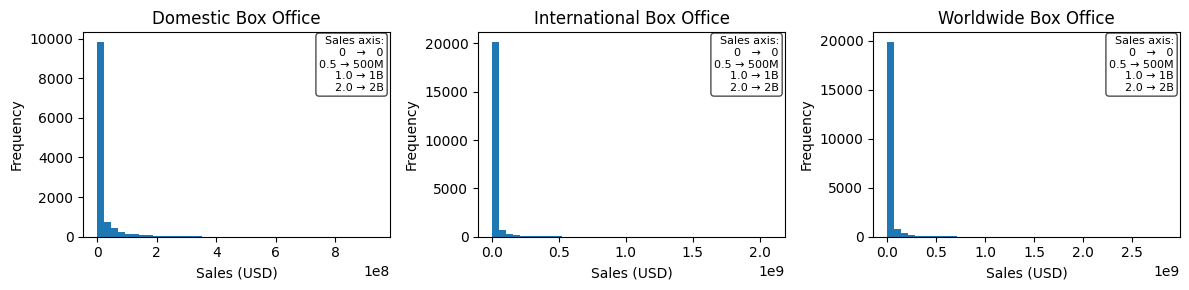

In [4]:
# Plot sales distributions
cols = ["domestic_box_office", "international_box_office", "worldwide_box_office"]
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

notation = (
    "Sales axis:\n"
    "0   →   0\n"
    "0.5 → 500M\n"
    "1.0 → 1B\n"
    "2.0 → 2B"
)

for ax, col in zip(axes, cols):
    if col in df_sales.columns:
        _ = ax.hist(df_sales[col].dropna(), bins=40)
        _ = ax.set_title(col.replace("_", " ").title())
        _ = ax.set_xlabel("Sales (USD)")
        _ = ax.set_ylabel("Frequency")

        # suppress printed return value
        _ = ax.text(
            0.98, 0.98,
            notation,
            transform=ax.transAxes,
            fontsize=8,
            ha='right',
            va='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
        )

plt.tight_layout()
plt.show()


**Interpretation of the Box Office Histograms**

The three histograms (Domestic, International, and Worldwide Box Office) show how movie revenues are distributed.
- The x-axis represents sales in USD, but very large values are shown in compressed scientific notation. The legend explains that values like 0.5, 1.0, 2.0 actually correspond to 500M, 1B, and 2B USD.
- The y-axis, labeled Frequency, indicates how many movies fall into each revenue range (bin). A higher bar means more movies in that sales interval.

Across all three charts, the very tall bar near zero shows that most movies earn very little revenue, while only a small number reach hundreds of millions or billions. This creates a long right tail, indicating that box office revenues are extremely skewed, with many low-earning films and a few very high-earning blockbusters.

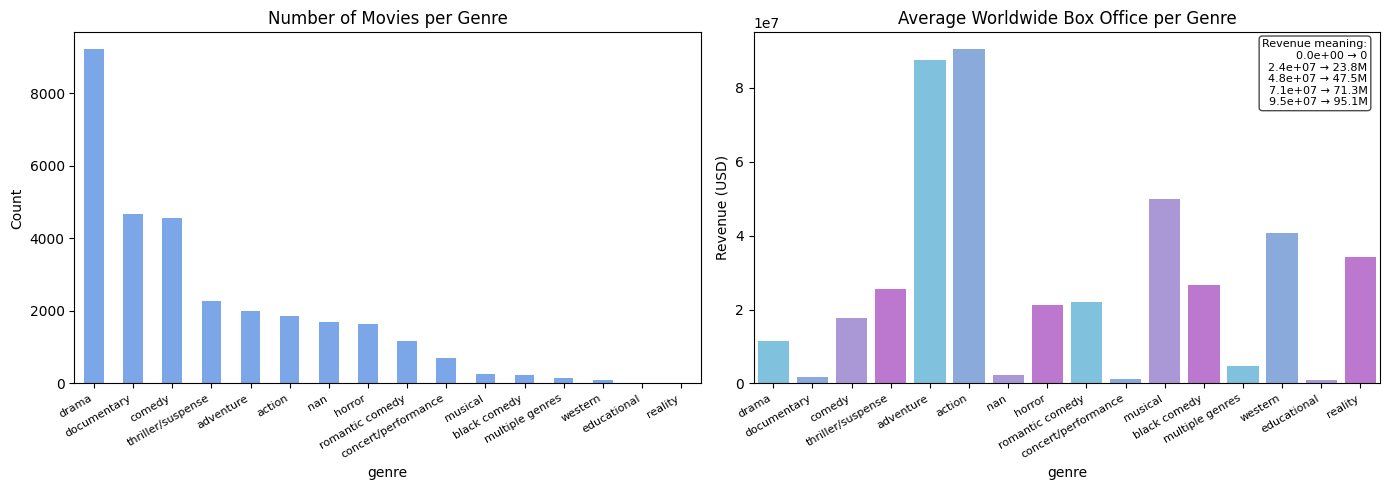

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_counts = df_sales['genre'].value_counts()  # number of movies per genre

# align sales to the same genre order as counts
genre_sales = (
    df_sales.groupby('genre')['worldwide_box_office']
    .mean()
    .reindex(genre_counts.index)
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
palette = ["#71C7EC", "#7BA7E8", "#A68DE1", "#C46ADD"]

# genre counts 
genre_counts.plot(kind='bar', ax=axes[0], color="#7BA7E8")
axes[0].set_title("Number of Movies per Genre")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("genre")

# average sales per genre 
sns.barplot(
    x=genre_sales.index,
    y=genre_sales.values,
    palette=palette,
    ax=axes[1]
)
axes[1].set_title("Average Worldwide Box Office per Genre")
axes[1].set_ylabel("Revenue (USD)")
axes[1].set_xlabel("genre")

# x-label formatting: rotate + right-align + smaller font
for ax in axes:
    ax.tick_params(axis='x', labelrotation=30, labelsize=8)
    for label in ax.get_xticklabels():
        label.set_ha('right')

# dynamic notation based on y-axis (
ymin, ymax = axes[1].get_ylim()

def human_format(num):
    if num >= 1_000_000_000:
        return f"{num/1e9:.1f}B"
    if num >= 1_000_000:
        return f"{num/1e6:.1f}M"
    return f"{num:.0f}"

notation = (
    "Revenue meaning:\n"
    f"{ymin:.1e} → {human_format(ymin)}\n"
    f"{(ymax*0.25):.1e} → {human_format(ymax*0.25)}\n"
    f"{(ymax*0.50):.1e} → {human_format(ymax*0.50)}\n"
    f"{(ymax*0.75):.1e} → {human_format(ymax*0.75)}\n"
    f"{ymax:.1e} → {human_format(ymax)}"
)

axes[1].text(
    0.98, 0.98,
    notation,
    transform=axes[1].transAxes,
    fontsize=8,
    ha='right',
    va='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

plt.tight_layout()
plt.show()


Genre Summary: 

- Drama is the most produced genre, but earns low average revenue.
- Action and adventure earn the highest revenues (≈$90M+).
- Musical and reality have few films but high revenue.
- Documentary, drama, and educational genres show very low earnings.
- High production volume does not correlate with high revenue.

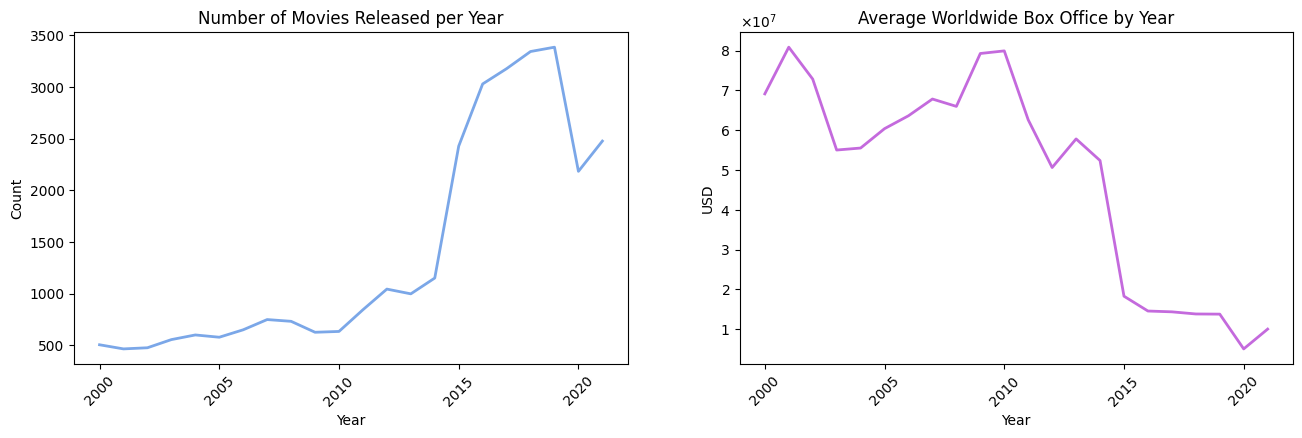

In [5]:
from matplotlib.ticker import ScalarFormatter

year_counts = df_sales['year'].value_counts().sort_index()
year_avg_sales = df_sales.groupby('year')['worldwide_box_office'].mean()

palette = ["#71C7EC", "#7BA7E8", "#A68DE1", "#C46ADD"]

# merged plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.tight_layout(pad=5)

# number of movies released per year
axes[0].plot(year_counts.index, year_counts.values, color=palette[1], linewidth=2)
axes[0].set_title("Number of Movies Released per Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

# average worldwide box office per year
axes[1].plot(year_avg_sales.index, year_avg_sales.values, color=palette[3], linewidth=2)
axes[1].set_title("Average Worldwide Box Office by Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("USD")
axes[1].tick_params(axis="x", rotation=45)

# notation
axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.show()


Yearly Trends:

- Movies released increased sharply from 2000 to 2018, peaking at ~3,400 films.
- Production dropped in 2019–2020, likely due to global disruptions.
- Average box office peaked around 2001 and 2010, then declined steadily after 2013.
- Recent years show many more movies but much lower revenue per film.

Yearly Trends:

- Movies released increased sharply from 2000 to 2018, peaking at ~3,400 films.
- Production dropped in 2019–2020, likely due to global disruptions.
- Average box office peaked around 2001 and 2010, then declined steadily after 2013.
- Recent years show many more movies but much lower revenue per film.

# 1.5 Data Integration (Iro)

1. Helper function 

Scope:

Define three utility functions to standardize key movie identifiers:
- extract_url_slug() → isolates the comparable part of each URL
- normalize_title() → cleans and standardizes movie titles
- make_movie_id() → generates a unique, stable movie identifier

A consistent system for matching movies across all datasets, even when URLs differ, titles vary, or remakes exist.

In [7]:
import re

# Extract last part of URL to use as slug
def extract_url_slug(url):
    if pd.isna(url):
        return np.nan
    url = str(url)
    url = url.split('?')[0].split('#')[0]
    slug = url.strip('/').split('/')[-1].lower()
    slug = re.sub(r'[^a-z0-9\-]+', '-', slug)
    slug = re.sub(r'-+', '-', slug).strip('-')
    return slug or np.nan

# Normalize title for matching
STOP_WORDS = {"the", "a", "an"}

def normalize_title(title):
    if pd.isna(title):
        return np.nan
    t = re.sub(r'[^\w\s]', ' ', str(title).lower())
    words = t.split()
    if words and words[0] in STOP_WORDS:
        words = words[1:]
    return " ".join(words) or np.nan

# movie_key + SERIAL MOVIE ID SYSTEM 

def build_movie_key(df: pd.DataFrame) -> pd.Series:
    """
    One logical key per movie: normalized_title + release_year.
    Same movie across datasets => same movie_key.
    """
    return (
        df["normalized_title"].fillna("").astype(str)
        + "||" +
        df["release_year"].fillna(0).astype(int).astype(str)
    )

serial_counter = {"count": 0}

def generate_serial_id():
    serial_counter["count"] += 1
    return f"MOV{serial_counter['count']:05d}"  # MOV00001, MOV00002, ...

def make_movie_id(movie_key):
    """
    Turn a movie_key into a serial movie_id.
    Called later in the master table, once per unique movie_key.
    """
    if pd.isna(movie_key) or movie_key == "":
        return np.nan
    return generate_serial_id()

2. Update Metaclean data

Scope:

Extract URL slug, normalize title, get release year, and assign movie_id for Metaclean movies.
Metaclean movies now have clean identifiers and are ready to join.

In [8]:
df_metaclean = df_metaclean.copy()

# URL slug
df_metaclean["url_slug"] = df_metaclean["url"].apply(extract_url_slug)

# Normalized title
df_metaclean["normalized_title"] = df_metaclean["title"].apply(normalize_title)

# Parse RelDate to datetime and extract year
df_metaclean["RelDate_parsed"] = pd.to_datetime(df_metaclean["RelDate"], errors="coerce")
df_metaclean["release_year"] = df_metaclean["RelDate_parsed"].dt.year

# NEW: movie_key (no movie_id yet)
df_metaclean["movie_key"] = build_movie_key(df_metaclean)

df_metaclean.head()


,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate,url_slug,normalized_title,RelDate_parsed,release_year,movie_key
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01,women-art-revolution,women art revolution,2011-06-01,2011,women art revolution||2011
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11,10-cloverfield-lane,10 cloverfield lane,2016-03-11,2016,10 cloverfield lane||2016
2,https://www.metacritic.com/movie/10-items-or-less,10 Items or Less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,54,5.8,2006-12-01,10-items-or-less,10 items or less,2006-12-01,2006,10 items or less||2006
3,https://www.metacritic.com/movie/10-years,10 Years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,61,6.9,2012-09-14,10-years,10 years,2012-09-14,2012,10 years||2012
4,https://www.metacritic.com/movie/100-bloody-acres,100 Bloody Acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,63,7.5,2013-06-28,100-bloody-acres,100 bloody acres,2013-06-28,2013,100 bloody acres||2013


3. Update Sales 

Scope:

Extract URL slug, normalize title, use Sales year, and assign movie_id for Sales movies.

Sales data follows the same ID system and can be merged with Metaclean.

In [9]:
df_sales = df_sales.copy()

# URL slug
df_sales["url_slug"] = df_sales["url"].apply(extract_url_slug)

# Normalized title
df_sales["normalized_title"] = df_sales["title"].apply(normalize_title)

# Use 'year' column as release_year
df_sales["release_year"] = df_sales["year"]

# NEW: movie_key (no movie_id yet)
df_sales["movie_key"] = build_movie_key(df_sales)

df_sales.head()


,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url,url_slug,normalized_title,release_year,movie_key
0,2000,January 1st,Bakha Satang,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...,bakha-satang-s-korea,bakha satang,2000,bakha satang||2000
1,2001,January 12th,Antitrust,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust,antitrust,antitrust,2001,antitrust||2001
2,2000,January 28th,Santitos,NaN,NaN,378562.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,https://www.the-numbers.com/movie/Santitos,santitos,santitos,2000,santitos||2000
3,2002,2002 (Wide) by,Frank McKlusky C.I.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.the-numbers.com/movie/Frank-McKlus...,frank-mcklusky-c-i,frank mcklusky c i,2002,frank mcklusky c i||2002
4,2002,January 25th,A Walk to Remember,Drama,4833792.0,41227069.0,46060861.0,11000000.0,NaN,12177488.0,2411.0,5.3,NaN,Coming of Age,Contemporary Fiction,https://www.the-numbers.com/movie/Walk-to-Reme...,walk-to-remember-a,walk to remember,2002,walk to remember||2002


Now Sales has the same movie_key as Metaclean for the same title+year.

4. Build the master movie table

Scope:

Combine Metaclean and Sales movies, remove duplicates, and form one master list.

A unified movies_master table with one consistent movie_id per movie.

In [10]:
# Build the master movie table (with movie_key + source_label) 
# 1) Define desired columns from each dataset
meta_wanted = [
    "movie_key", "url", "url_slug", "title", "normalized_title",
    "release_year", "RelDate", "runtime", "studio", "genre", "director",
    "cast"
]

sales_wanted = [
    "movie_key", "url", "url_slug", "title", "normalized_title",
    "release_year", "release_date", "runtime", "genre", "studio"
]

# 2) Keep only existing columns
meta_cols = [c for c in meta_wanted if c in df_metaclean.columns]
sales_cols = [c for c in sales_wanted if c in df_sales.columns]

# 3) Build movie tables with source labels
meta_movies = df_metaclean[meta_cols].copy()
meta_movies["source_label"] = "metaclean"

sales_movies = df_sales[sales_cols].copy()
sales_movies["source_label"] = "sales"

# 4) Combine the two
movies_all = pd.concat([meta_movies, sales_movies], ignore_index=True)

# 5) One row per unique movie_key
movies_master = (
    movies_all
    .drop_duplicates(subset=["movie_key"], keep="first")
    .reset_index(drop=True)
)

# 6) NOW create the serial movie_id once per movie_key
movies_master["movie_id"] = movies_master["movie_key"].apply(make_movie_id)

movies_master.head()


,movie_key,url,url_slug,title,normalized_title,release_year,RelDate,runtime,studio,genre,director,cast,source_label,release_date,movie_id
0,women art revolution||2011,https://www.metacritic.com/movie/!women-art-re...,women-art-revolution,!Women Art Revolution,women art revolution,2011,2011-06-01,83.0,Hotwire Productions,Documentary,Lynn Hershman-Leeson,NaN,metaclean,NaN,MOV00001
1,10 cloverfield lane||2016,https://www.metacritic.com/movie/10-cloverfiel...,10-cloverfield-lane,10 Cloverfield Lane,10 cloverfield lane,2016,2016-03-11,104.0,Paramount Pictures,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror",Dan Trachtenberg,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",metaclean,NaN,MOV00002
2,10 items or less||2006,https://www.metacritic.com/movie/10-items-or-less,10-items-or-less,10 Items or Less,10 items or less,2006,2006-12-01,82.0,Click Star,"Drama,Comedy,Romance",Brad Silberling,"Jonah Hill,Morgan Freeman,Paz Vega",metaclean,NaN,MOV00003
3,10 years||2012,https://www.metacritic.com/movie/10-years,10-years,10 Years,10 years,2012,2012-09-14,100.0,Anchor Bay Entertainment,"Drama,Comedy,Romance",Jamie Linden,"Channing Tatum,Chris Pratt,Jenna Dewan",metaclean,NaN,MOV00004
4,100 bloody acres||2013,https://www.metacritic.com/movie/100-bloody-acres,100-bloody-acres,100 Bloody Acres,100 bloody acres,2013,2013-06-28,91.0,Music Box Films,"Horror,Comedy",Cameron Cairnes,NaN,metaclean,NaN,MOV00005


Short Explanation of Key Metadata: 
- movie_id
    A unique serial code that identifies each movie across all datasets.
- url_slug
    A cleaned identifier extracted from the movie’s URL, used to match movies between Metacritic and Sales data.
- normalized_title
    A standardized version of the title (lowercase, punctuation removed, stop-words removed) to help detect duplicates and remakes.
- release_year
    Used to distinguish movies with the same title (different versions or remakes).
- RelDate
    Release date from Metacritic — the editorial/critic-side reference date.
- source_label
    Indicates where the row came from (metaclean or sales), allowing comparison of editorial metadata vs financial metadata.
    cast

Overall, this table combines movie information from different sources into one clean reference framework, enabling reliable linking of reviews, box office data, and metadata through a consistent movie_id.

In [11]:
# Attach movie_id back to original tables (PK→FK)
df_metaclean = df_metaclean.merge(
    movies_master[["movie_key", "movie_id"]],
    on="movie_key",
    how="left"
)

df_sales = df_sales.merge(
    movies_master[["movie_key", "movie_id"]],
    on="movie_key",
    how="left"
)


Now the same movie (same title + year) has the same movie_id in:
movies_master
df_metaclean
df_sales

5. Attach movie_id to Expert reviews 

Scope:

Match reviews to movies using URL slug, then add movie_id.

All expert reviews are linked to the correct movie entry.

In [12]:
df_exreviews = df_exreviews.copy()

# URL slug
df_exreviews["url_slug"] = df_exreviews["url"].apply(extract_url_slug)

# Merge on url_slug -> movie_id
df_exreviews = df_exreviews.merge(
    movies_master[["movie_id", "url_slug"]],
    on="url_slug",
    how="left",
    suffixes=("", "_movie")
)

df_exreviews.head()


,url,idvscore,reviewer,dateP,Rev,url_slug,movie_id
0,https://www.metacritic.com/movie/bronson,100.0,"""Andrew O'Hehir""",None,'Bronson owes a little or a lot to Kubrick s ...,bronson,MOV01565
1,https://www.metacritic.com/movie/bronson,90.0,'A.O. Scott',None,'Bronson invites you to admire its protagonis...,bronson,MOV01565
2,https://www.metacritic.com/movie/bronson,90.0,None,None,'Whether it s Peterson/Bronson s more theatri...,bronson,MOV01565
3,https://www.metacritic.com/movie/bronson,83.0,'Noel Murray',None,'There are two Bronsons on display here: the ...,bronson,MOV01565
4,https://www.metacritic.com/movie/bronson,80.0,'Joshua Rothkopf',None,'Refn has somehow found his way to an authent...,bronson,MOV01565


6. Attach movie_id to User reviews 

Scope:

Match user reviews to movies using URL slug, then add movie_id.

All user reviews are now connected to the right movie.

In [13]:
df_usreviews = df_usreviews.copy()

# URL slug
df_usreviews["url_slug"] = df_usreviews["url"].apply(extract_url_slug)

# Merge on url_slug -> movie_id
df_usreviews = df_usreviews.merge(
    movies_master[["movie_id", "url_slug"]],
    on="url_slug",
    how="left",
    suffixes=("", "_movie")
)

df_usreviews.head()


,url,idvscore,reviewer,dateP,Rev,thumbsUp,thumbsTot,url_slug,movie_id
0,https://www.metacritic.com/movie/bronson,8,'Longbottom94',"'Apr 25, 2013'",'Many have dismissed this film for not explor...,2,2,bronson,MOV01565
1,https://www.metacritic.com/movie/bronson,9,'MartinB',"'Oct 13, 2009'",'Anyone who doesn t like this movie simply ju...,0,1,bronson,MOV01565
2,https://www.metacritic.com/movie/bronson,10,'Jaakko',"'Jul 19, 2012'",'Not sure what to think at this film at first...,1,1,bronson,MOV01565
3,https://www.metacritic.com/movie/bronson,6,'CapoR',"'Oct 13, 2009'",'Nicely portrayed but it lacks the elements t...,0,1,bronson,MOV01565
4,https://www.metacritic.com/movie/bronson,8,'OrwellB.',"'Oct 10, 2009'",'Bronson is more than entertainment. It is ar...,0,0,bronson,MOV01565


**For dateP, we already have changed from 1.2 and 1.3. the date format , so double check if it works **

test the output - we can use part of this code to merge the datasets 

In [26]:
# titles that appear in more than one release_year
remake_counts = (
    movies_master
    .groupby("normalized_title")["release_year"]
    .nunique()
)

remake_titles = remake_counts[remake_counts > 1]
remake_titles.head()


normalized_title
100 streets    2
11th hour      2
13 minutes     2
17 blocks      2
1921           2
Name: release_year, dtype: int64

In [28]:
# Sales summary (one row per movie_id)
sales_main = (
    df_sales
    .drop_duplicates(subset=["movie_id"])
    [["movie_id", "year", "domestic_box_office",
      "international_box_office", "worldwide_box_office"]]
)

#Expert review summary (ensure numeric)
exp_tmp = df_exreviews.copy()
exp_tmp["idvscore"] = pd.to_numeric(exp_tmp["idvscore"], errors="coerce")

exp_summary = (
    exp_tmp
    .groupby("movie_id", as_index=False)
    .agg(
        n_expert_reviews=("idvscore", "count"),
        avg_expert_score=("idvscore", "mean")
    )
)

# User review summary (ensure numeric)
usr_tmp = df_usreviews.copy()
usr_tmp["idvscore"] = pd.to_numeric(usr_tmp["idvscore"], errors="coerce")

usr_summary = (
    usr_tmp
    .groupby("movie_id", as_index=False)
    .agg(
        n_user_reviews=("idvscore", "count"),
        avg_user_score=("idvscore", "mean")
    )
)

# Merge everything with movies_master
movie_panel = (
    movies_master
    .merge(sales_main, on="movie_id", how="left")
    .merge(exp_summary, on="movie_id", how="left")
    .merge(usr_summary, on="movie_id", how="left")
)


In [29]:
remake_example = movie_panel[
    movie_panel["normalized_title"] == some_title
][[
    "movie_id",
    "url",
    "url_slug",
    "title",
    "release_year",
    "RelDate",
    "source_label",
    "year",                    # sales year
    "domestic_box_office",
    "international_box_office",
    "worldwide_box_office",
    "n_expert_reviews",
    "avg_expert_score",
    "n_user_reviews",
    "avg_user_score"
]]

remake_example


,movie_id,url,url_slug,title,release_year,RelDate,source_label,year,domestic_box_office,international_box_office,worldwide_box_office,n_expert_reviews,avg_expert_score,n_user_reviews,avg_user_score
5,MOV00006,https://www.metacritic.com/movie/100-streets,100-streets,100 Streets,2017,2017-01-13,metaclean,NaN,NaN,NaN,NaN,12.0,47.916667,0.0,NaN
13207,MOV13208,https://www.the-numbers.com/movie/100-Streets-...,100-streets-uk,100 Streets,2016,NaT,sales,2016.0,NaN,307.0,307.0,NaN,NaN,NaN,NaN


This is the merged table, we can join also other cells from other tables

# 1.6 Genre / Actor / Cast Table Creation and Unique IDs (Iro)

In [19]:
# Normalization helpers (put in a new cell after movie_panel)

def split_list_string(s):
    """
    Generic splitter for columns like 'genre' and 'cast'.
    Tries to handle common separators: ',', '/', '|', ';'
    Returns a clean list of non-empty strings.
    """
    if pd.isna(s):
        return []
    parts = re.split(r'[|/;,]', str(s))
    return [p.strip() for p in parts if p and p.strip()]

Genre table: One row per (movie_id, genre), separate serial genre_id


In [20]:
# Start from movies_master, which already has one row per movie_id
genre_rows = (
    movies_master[["movie_id", "genre"]]
    .dropna(subset=["genre"])                           # keep rows that have a genre
    .assign(genre_list=lambda df: df["genre"].apply(split_list_string))
    .explode("genre_list")                              # one row per movie_id–genre
    .rename(columns={"genre_list": "genre_name"})
)

# Clean and deduplicate
genre_rows["genre_name"] = genre_rows["genre_name"].str.strip()
genre_rows = genre_rows[genre_rows["genre_name"] != ""]
genre_rows = genre_rows.drop_duplicates(subset=["movie_id", "genre_name"]).reset_index(drop=True)

# Add serial genre_id (PK for this table)
genre_rows["genre_id"] = [
    f"GEN{idx:05d}" for idx in range(1, len(genre_rows) + 1)
]

# Final Genre table (as per your spec)
genre_table = genre_rows[["genre_id", "movie_id", "genre_name"]]

genre_table.head()

,genre_id,movie_id,genre_name
0,GEN00001,MOV00001,Documentary
1,GEN00002,MOV00002,Action
2,GEN00003,MOV00002,Sci-Fi
3,GEN00004,MOV00002,Drama
4,GEN00005,MOV00002,Mystery


Actor + Cast tables: 
Actor Table: one row per actor name, separate serial actor_id
Cast Table: relationship table linking actor_id ↔ movie_id (using cast strings)

In [21]:
# Explode the cast column at movie level
cast_exploded = (
    movies_master[["movie_id", "cast"]]
    .dropna(subset=["cast"])                               # keep rows with cast info
    .assign(actor_list=lambda df: df["cast"].apply(split_list_string))
    .explode("actor_list")
    .rename(columns={"actor_list": "actor_name"})
)

# Clean actor names
cast_exploded["actor_name"] = cast_exploded["actor_name"].str.strip()
cast_exploded = cast_exploded[cast_exploded["actor_name"] != ""]
cast_exploded = cast_exploded.drop_duplicates(subset=["movie_id", "actor_name"]).reset_index(drop=True)

# Build ACTOR TABLE (dimension)
actors = (
    cast_exploded[["actor_name"]]
    .drop_duplicates()
    .sort_values("actor_name")
    .reset_index(drop=True)
)

actors["actor_id"] = [
    f"ACT{idx:05d}" for idx in range(1, len(actors) + 1)
]

actor_table = actors[["actor_id", "actor_name"]]

# Build CAST TABLE (linking actor_id <-> movie_id)
cast_table = (
    cast_exploded
    .merge(actor_table, on="actor_name", how="left")
    [["actor_id", "movie_id"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

actor_table.head(), cast_table.head()

(   actor_id         actor_name
 0  ACT00001            50 Cent
 1  ACT00002            6ix9ine
 2  ACT00003         A Martinez
 3  ACT00004   A. Brian Daniels
 4  ACT00005  A. Patrice Moreau,
    actor_id  movie_id
 0  ACT11712  MOV00002
 1  ACT11720  MOV00002
 2  ACT16010  MOV00002
 3  ACT11927  MOV00003
 4  ACT17396  MOV00003)

In [22]:
# Sort for reproducibility of the IDs (optional but a good idea)
df_sales = df_sales.sort_values(["movie_id", "release_date"]).reset_index(drop=True)

df_sales["sale_id"] = [
    f"SAL{idx:06d}" for idx in range(1, len(df_sales) + 1)
]

df_sales.head()

,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,...,runtime,keywords,creative_type,url,url_slug,normalized_title,release_year,movie_key,movie_id,sale_id
0,2011,June 1st,"!Women, Art, Revolution",Documentary,NaN,52681.0,NaN,NaN,NaN,5791.0,...,83.0,Artists,Factual,https://www.the-numbers.com/movie/Women-Art-Re...,women-art-revolution,women art revolution,2011,women art revolution||2011,MOV00001,SAL000001
1,2016,March 11th,10 Cloverfield Lane,Thriller/Suspense,36203423.0,72082999.0,108286422.0,15000000.0,NaN,24727437.0,...,103.0,Kidnap,Contemporary Fiction,https://www.the-numbers.com/movie/10-Cloverfie...,10-cloverfield-lane,10 cloverfield lane,2016,10 cloverfield lane||2016,MOV00002,SAL000002
2,2012,September 14th,10 Years,Drama,783986.0,203654.0,987640.0,NaN,NaN,22707.0,...,100.0,Ensemble,Contemporary Fiction,https://www.the-numbers.com/movie/10-Years,10-years,10 years,2012,10 years||2012,MOV00004,SAL000003
3,2013,June 28th,100 Bloody Acres,Black Comedy,NaN,6388.0,NaN,NaN,NaN,3419.0,...,91.0,Accidental Death,Contemporary Fiction,https://www.the-numbers.com/movie/100-Bloody-A...,100-bloody-acres,100 bloody acres,2013,100 bloody acres||2013,MOV00005,SAL000004
4,2015,July 10th,"10,000 KM",Drama,20452.0,NaN,20452.0,NaN,NaN,NaN,...,98.0,Romance,Contemporary Fiction,https://www.the-numbers.com/movie/10000-KM,10000-km,10 000 km,2015,10 000 km||2015,MOV00009,SAL000005


In [23]:
df_exreviews.columns

Index(['url', 'idvscore', 'reviewer', 'dateP', 'Rev', 'url_slug', 'movie_id'], dtype='object')

In [24]:
#  REVIEW_ID on Expert reviews 

# auto-detect a date column if one exists
date_candidates = ["datep_clean", "datep", "dateP", "date", "review_date", "pubdate", "pub_date"]
date_col = None
for c in date_candidates:
    if c in df_exreviews.columns:
        date_col = c
        break

# Always sort at least by movie_id, and by date if available
sort_cols = ["movie_id"]
if date_col is not None:
    sort_cols.append(date_col)

df_exreviews = df_exreviews.sort_values(sort_cols).reset_index(drop=True)

# Create/overwrite expert_review_id
df_exreviews["expert_review_id"] = [
    f"EXR{idx:07d}" for idx in range(1, len(df_exreviews) + 1)
]

df_exreviews.head()


,url,idvscore,reviewer,dateP,Rev,url_slug,movie_id,expert_review_id
0,https://www.metacritic.com/movie/!women-art-re...,75.0,None,"'Aug 25, 2011'","'Fortunately, !Woman Art Revolution isn t a s...",women-art-revolution,MOV00001,EXR0000001
1,https://www.metacritic.com/movie/!women-art-re...,80.0,'Kevin Thomas',"'Jun 16, 2011'",'In her vibrant !Women Art Revolution Hershma...,women-art-revolution,MOV00001,EXR0000002
2,https://www.metacritic.com/movie/!women-art-re...,75.0,None,"'Jun 16, 2011'","'It s affecting, and the tone, which is polem...",women-art-revolution,MOV00001,EXR0000003
3,https://www.metacritic.com/movie/!women-art-re...,63.0,'Mike Scott',"'Jun 17, 2011'",'These women deserve to have their voices hea...,women-art-revolution,MOV00001,EXR0000004
4,https://www.metacritic.com/movie/!women-art-re...,90.0,'Rachel Saltz',"'Jun 2, 2011'",'These interviews form the backbone of !W.A.R...,women-art-revolution,MOV00001,EXR0000005


In [ ]:
df_usreviews.columns

In [25]:
# REVIEW_ID on User reviews 

date_candidates = ["datep", "dateP", "date", "review_date", "pubdate", "pub_date"]
date_col = None
for c in date_candidates:
    if c in df_usreviews.columns:
        date_col = c
        break

sort_cols = ["movie_id"]
if date_col is not None:
    sort_cols.append(date_col)

df_usreviews = df_usreviews.sort_values(sort_cols).reset_index(drop=True)

df_usreviews["user_review_id"] = [
    f"USR{idx:07d}" for idx in range(1, len(df_usreviews) + 1)
]

df_usreviews.head()

,url,idvscore,reviewer,dateP,Rev,thumbsUp,thumbsTot,url_slug,movie_id,user_review_id
0,https://www.metacritic.com/movie/!women-art-re...,NaN,NaN,NaN,NaN,NaN,NaN,women-art-revolution,MOV00001,USR0000001
1,https://www.metacritic.com/movie/10-cloverfiel...,8,'Filmcritic1956',"'Apr 1, 2016'","'Ending was bad, switched genres. First 90% -...",5,6,10-cloverfield-lane,MOV00002,USR0000002
2,https://www.metacritic.com/movie/10-cloverfiel...,8,'cjm868',"'Apr 1, 2016'",'What a fantastic movie! 10 Cloverfield Lane ...,3,4,10-cloverfield-lane,MOV00002,USR0000003
3,https://www.metacritic.com/movie/10-cloverfiel...,8,'Unladenswallow0',"'Apr 1, 2016'",'If you like the flintstones and you likes cl...,2,3,10-cloverfield-lane,MOV00002,USR0000004
4,https://www.metacritic.com/movie/10-cloverfiel...,4,'jez1968',"'Apr 1, 2016'",'Good tension and build up for the first 90 m...,3,13,10-cloverfield-lane,MOV00002,USR0000005


In [ ]:
#movies_master.head()
#df_sales.head()
#genre_table.head()
#actor_table.head()
#cast_table.head()


# 1.7. Outlier Detection (Iro)

In [39]:
for col in sales_cols:
    neg = (df_sales[col] < 0).sum()
    zero = (df_sales[col] == 0).sum()
    print(f"{col}: negative={neg}, zeros={zero}")

year: negative=0, zeros=0
international_box_office: negative=0, zeros=0
domestic_box_office: negative=0, zeros=0
worldwide_box_office: negative=0, zeros=0
production_budget: negative=0, zeros=0
Unnamed: 8: negative=0, zeros=0
opening_weekend: negative=0, zeros=0
theatre_count: negative=0, zeros=0
avg run per theatre: negative=0, zeros=17
runtime: negative=0, zeros=0
release_year: negative=0, zeros=0


So, there are no outliers 

# 1.8. Distribution plots 

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distributions(df, title="Distribution of Numeric Columns", n_cols=3):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    if len(num_cols) == 0:
        print("No numeric columns found.")
        return
    
    n_rows = int(np.ceil(len(num_cols) / n_cols))
    
    plt.figure(figsize=(9, 2.2 * n_rows))  # compact layout
    
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(col, fontsize=9)
        plt.xlabel("")
        plt.ylabel("")
    
    plt.suptitle(title, fontsize=12, y=1.02)
    plt.tight_layout(pad=1.0)
    plt.show()

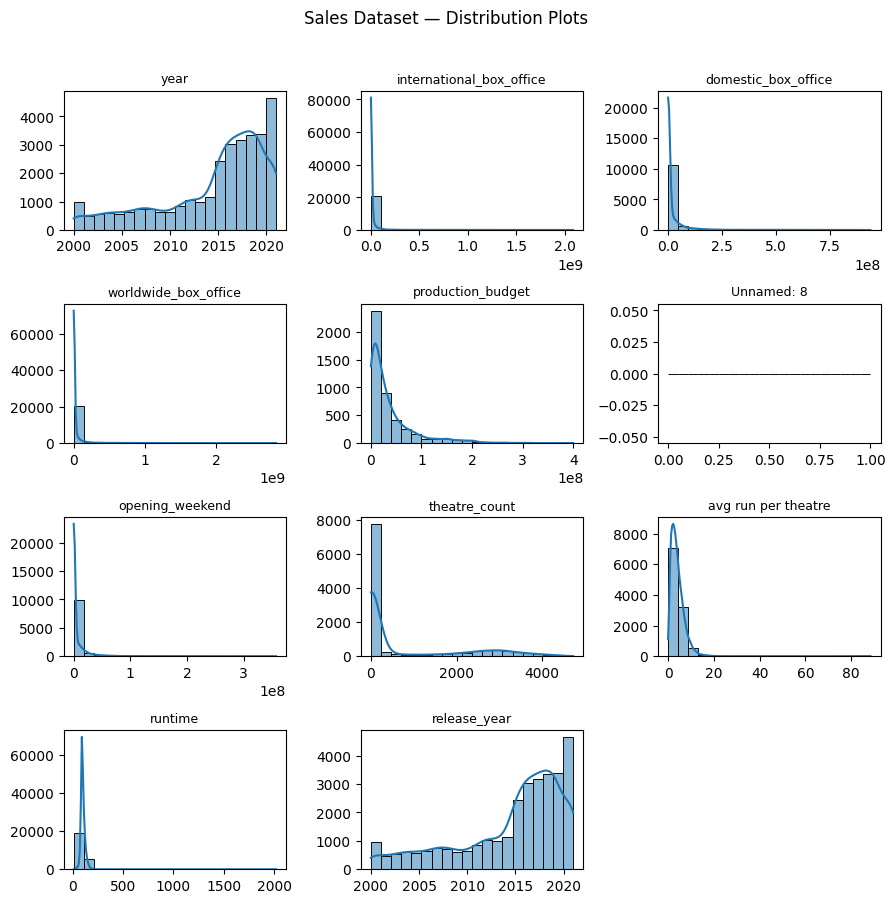

In [65]:
plot_numeric_distributions(df_sales, title="Sales Dataset — Distribution Plots")